# COVID - 19 CLassification Analysis

In [1]:
import numpy as np
import pandas as pd
from numpy import nan
import scipy
import matplotlib.pyplot as plt
from pandas import Series, DataFrame


In [2]:
address = 'D:\COVID-19Research\dataset.csv'
covid = pd.read_csv(address)
covid.head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,30,male,"Chaohu City, Hefei City",Anhui,China,31.646960,117.7166,admin3,18.01.2020,...,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181.0,NaN,NaN
1,000-1-1,60-69,female,Whatcom County,Washington,United States,48.826129,-121.71928999999999,admin2,NaN,...,NaN,NaN,NaN,NaN,Whatcom County,Washington,United States,2994.0,NaN,NaN
2,000-1-10,30,male,Hefei City,Anhui,China,31.794440,117.3428,admin2,17.01.2020,...,NaN,NaN,NaN,NaN,Hefei City,Anhui,China,340100.0,NaN,NaN
3,000-1-10,60-69,female,Pitkin County,Colorado,United States,39.217302,-106.91528000000001,admin2,NaN,...,NaN,NaN,NaN,NaN,Pitkin County,Colorado,United States,291.0,NaN,NaN
4,000-1-100,44,male,NaN,Zurich,Switzerland,47.417813,8.65596766,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Zurich,Switzerland,26.0,NaN,NaN


Data Cleaning 

Dropping the NaN values from the rows to avoid any noisy data


In [3]:
covid.drop(columns = ['admin1','admin2','admin3','admin_id','notes_for_discussion','location','data_moderator_initials','latitude','longitude','date_onset_symptoms','outcome','source','additional_information','geo_resolution','province'],axis=1, inplace=True)
covid.head()


,ID,age,sex,city,country,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,chronic_disease_binary,chronic_disease,sequence_available,date_death_or_discharge,country_new,travel_history_binary
0,000-1-1,30,male,"Chaohu City, Hefei City",China,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,NaN,China,NaN
1,000-1-1,60-69,female,Whatcom County,United States,NaN,10.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN
2,000-1-10,30,male,Hefei City,China,22.01.2020,23.01.2020,NaN,yes,21.01.2020,Wuhan,NaN,NaN,NaN,NaN,NaN,China,NaN
3,000-1-10,60-69,female,Pitkin County,United States,NaN,11.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN
4,000-1-100,44,male,NaN,Switzerland,NaN,07.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://github.com/openZH/covid_19,NaN,Switzerland,NaN


In [4]:
covid = covid[covid['date_death_or_discharge'].notna()]

In [6]:
covid = covid[covid['country'].notna()]

In [8]:
covid = covid[covid['symptoms'].notna()]

In [10]:
covid = covid[covid['lives_in_Wuhan'].notna()]

In [11]:
covid

,ID,age,sex,city,country,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,chronic_disease_binary,chronic_disease,sequence_available,date_death_or_discharge,country_new,travel_history_binary
826,000-1-10674,29,male,"Luzzara, Reggio Emilia",Italy,NaN,06.02.2020,"eye irritation, fever",no,03.02.2020,Wuhan,NaN,NaN,NaN,NaN,22.02.2020,Italy,NaN
1128,000-1-10920,55,female,"Son Loi commune, Binh Xuyen District",Vietnam,04.02.2020,09.02.2020,"fever, headache, runny nose",no,NaN,NaN,NaN,NaN,NaN,NaN,18.02.2020,Vietnam,NaN
1129,000-1-10921,0.25,female,"Quat Luu commune, Binh Xuyen District",Vietnam,NaN,11.02.2020,"cough, runny nose",no,NaN,NaN,NaN,NaN,NaN,NaN,20.02.2020,Vietnam,NaN
2479,000-1-12047,30,female,Paris,France,24.01.2020,24.01.2020,"chills, cough, fatigue, fever",yes,19.01.2020,Wuhan,NaN,NaN,NaN,NaN,12.02.2020,France,NaN
2481,000-1-12048,31,male,Paris,France,24.01.2020,24.01.2020,"chills, conjunctivitis, cough, fever",yes,19.01.2020,Wuhan,NaN,NaN,NaN,NaN,12.02.2020,France,NaN
5860,000-1-1485,33,male,Starnberg,Germany,NaN,27.01.2020,"chills, fever, myalgias, sore throat",no,NaN,NaN,no,0,NaN,NaN,27.01.2020,Germany,NaN
7679,000-1-164,29,male,Fangchenggang City,China,23.01.2020,24.01.2020,discomfort,no,23.01.2020,"Ezhou City, Hubei",NaN,NaN,NaN,NaN,28.01.2020,China,NaN
9807,000-1-1818,NaN,female,Xishuangbanna Prefecture,China,23.01.2020,27.01.2020,"fever, sore throat",yes,22.01.2020,Wuhan,NaN,NaN,NaN,NaN,07.02.2020,China,NaN


In [12]:
covid["date_death_or_discharge"].replace({"22.02.2020":2},inplace=True)
covid["date_death_or_discharge"].replace({"18.02.2020":2},inplace=True)
covid["date_death_or_discharge"].replace({"20.02.2020":2},inplace=True)
covid["date_death_or_discharge"].replace({"12.02.2020":2},inplace=True)
covid["date_death_or_discharge"].replace({"07.02.2020":2},inplace=True)
covid["date_death_or_discharge"].replace({"28.01.2020":1},inplace=True)
covid["date_death_or_discharge"].replace({"27.01.2020":1},inplace=True)

covid.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,ID,age,sex,city,country,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,chronic_disease_binary,chronic_disease,sequence_available,date_death_or_discharge,country_new,travel_history_binary
826,000-1-10674,29,male,"Luzzara, Reggio Emilia",Italy,NaN,06.02.2020,"eye irritation, fever",no,03.02.2020,Wuhan,NaN,NaN,NaN,NaN,2,Italy,NaN
1128,000-1-10920,55,female,"Son Loi commune, Binh Xuyen District",Vietnam,04.02.2020,09.02.2020,"fever, headache, runny nose",no,NaN,NaN,NaN,NaN,NaN,NaN,2,Vietnam,NaN
1129,000-1-10921,0.25,female,"Quat Luu commune, Binh Xuyen District",Vietnam,NaN,11.02.2020,"cough, runny nose",no,NaN,NaN,NaN,NaN,NaN,NaN,2,Vietnam,NaN
2479,000-1-12047,30,female,Paris,France,24.01.2020,24.01.2020,"chills, cough, fatigue, fever",yes,19.01.2020,Wuhan,NaN,NaN,NaN,NaN,2,France,NaN
2481,000-1-12048,31,male,Paris,France,24.01.2020,24.01.2020,"chills, conjunctivitis, cough, fever",yes,19.01.2020,Wuhan,NaN,NaN,NaN,NaN,2,France,NaN


Text(0, 0.5, 'Your Y axis label')

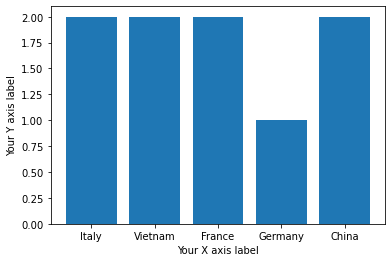

In [26]:
country = covid['country']
mortality = covid['date_death_or_discharge']

x= country
y = mortality
plt.bar(x,y)

plt.xlabel('Your X axis label')
plt.ylabel('Your Y axis label')

In [27]:
covid["country"].replace({"Italy":20},inplace=True)
covid["country"].replace({"Vietnam":30},inplace=True)
covid["country"].replace({"France":40},inplace=True)
covid["country"].replace({"Germany":50},inplace=True)
covid["country"].replace({"China":60},inplace=True)
covid


,country,date_death_or_discharge
826,20,2
1128,30,2
1129,30,2
2479,40,2
2481,40,2
5860,50,1
7679,60,1
9807,60,2


In [28]:
mortality = covid['date_death_or_discharge']
country = covid['country']

table = pd.crosstab(mortality, country)
from scipy.stats import chi2_contingency
chi2, p, dof,expected = chi2_contingency(table.values)
print('Chi-square %0.3f p_value %0.3f' % (chi2,p))

Chi-square 5.333 p_value 0.255


p > 0.05 , therefore we accept null hypothesis and conclude that country and death rate are independent 